## RSM 8431 Social Network Analysis
### Student Number: 1006604774

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def create_toy_network():

  G = nx.DiGraph()
  edges = [('9','7'), ('8','7'), ('8','6'), ('8','5'), ('7','6'), ('7','5'), ('6','5'), ('6','4'), ('5','4'), ('4','3'), ('4','1'), ('8','7'), ('3','2'), ('3','1'), ('2','1')]
  G.add_edges_from(edges)
  return G

In [4]:
G = create_toy_network()

C:\Users\14379\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\14379\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


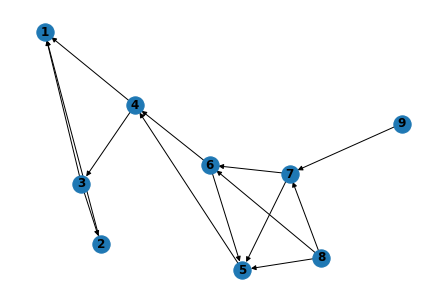

In [5]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [18]:
def pagerank(G, max_iter=1000, d=0.85, has_weight=False):
  page_rank_dict = {}

  #Defining epsilon for stopping criteria
  epsilon = 1.0e-6
  Page = list(G.nodes)
  # Transistion Matrix
  A = nx.to_numpy_matrix(G)   # using networkx function to_numpy_matrix to get adjacency matrix
  A = A/A.sum(axis=0)
  A = np.nan_to_num(A)

  # INITIAL VECTOR
    ## Adding a condition if weights are available but the user needs to input them in a fixed format
  if has_weight == True:
    ipr_str = input("Please provide the weights in the format '#, #, #, #, #, #, #, #, #'")
    ## converting the string input to list of floats
    ipr_str = ipr_str.split(', ') 
    for i in range(0, len(ipr_str)):
        ipr_str[i] = float(ipr_str[i])
    ## Error handling if the input weights are not in right format or length
    if len(list(ipr_str)) != len(list(Page)):
        raise ValueError("The size of weights matrix is not equal to the number of nodes./n Please check the weights.")
    else:
        pass
    ipr = np.matrix(ipr_str)
    ## transposing rX1 array to 1Xr size
    ipr = np.transpose(ipr)
    
    # if initial weights are set to default i.e. False   
  else:
    Page = list(G.nodes)
    ## length of the list to generate intial probability vector
    r = len(Page)
    ## array of length r
    ipr = np.zeros(r)
    ## filling the array with values 1/r
    ipr[:] = 1/r
    ## converting to Intial probability matrix
    ipr = np.matrix(ipr)
    ## transposing rX1 array to 1Xr size
    ipr = np.transpose(ipr)

  # Iterate
      # update equation
    # convergence condition check
  pre_ipr = ipr
  counter = 0  
  for i in range(1,max_iter):
    counter += 1
    ipr = d*(A*ipr)+(1-d)/len(Page)
    # if the difference between sum of elements of page rank matrix and previous iteration lower than epsilon the loop will break
    if np.abs(pre_ipr - ipr).sum() < epsilon:
        break
    pre_ipr = ipr
  print('Number of iterations: ' + str(counter)) 
  ## updating the dictionary
  Page_rank = np.array(ipr).reshape(-1,).tolist()
  d = dict(zip(Page,Page_rank))
  page_rank_dict.update(d)
    
  return page_rank_dict

In [21]:
pagerank(G, max_iter=100, d=0.85, has_weight=False)

Number of iterations: 9


C:\Users\14379\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


{'9': 0.03785685624511719,
 '7': 0.04985926959635417,
 '8': 0.0710494591748047,
 '6': 0.0513993046875,
 '5': 0.040051406250000005,
 '4': 0.05502291666666667,
 '3': 0.03956944444444445,
 '1': 0.01666666666666667,
 '2': 0.021388888888888895}

In [22]:
pagerank(G, max_iter=1000, d=0.85, has_weight=True)

C:\Users\14379\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Please provide the weights in the format '#, #, #, #, #, #, #, #, #' .111, .111, .111, .111, .111, .111, .111, .111, .111


Number of iterations: 9


{'9': 0.03785685624511719,
 '7': 0.04985926959635417,
 '8': 0.0710494591748047,
 '6': 0.0513993046875,
 '5': 0.040051406250000005,
 '4': 0.05502291666666667,
 '3': 0.03956944444444445,
 '1': 0.01666666666666667,
 '2': 0.021388888888888895}